# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# **Reading the Dataset**





In [4]:
df = pd.read_csv("/content/fake_job_postings_dataset_final.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# **Initial Data Inspection**

In [5]:
df.shape

(17880, 18)

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [10]:
df.columns.to_list()

['job_id',
 'title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

# **Data Cleaning**

In [11]:
df=df.iloc[:,1:]
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [12]:
df.isna().mean()*100

,0
title,0.000000
location,1.935123
department,64.580537
salary_range,83.959732
company_profile,18.501119
description,0.005593
requirements,15.078300
benefits,40.335570
telecommuting,0.000000
has_company_logo,0.000000


In [13]:
df.drop(columns=['salary_range','company_profile','description','requirements','benefits'],inplace=True)

In [14]:
df

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# **Handling Duplicates and Missing Values**

In [15]:
df.duplicated().sum()

np.int64(700)

In [16]:
df.drop_duplicates()

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [17]:
df.isna().sum()

,0
title,0
location,346
department,11547
telecommuting,0
has_company_logo,0
has_questions,0
employment_type,3471
required_experience,7050
required_education,8105
industry,4903


In [18]:
df.isna().sum().sum()

np.int64(41877)

In [19]:
df.isnull().mean()*100

,0
title,0.000000
location,1.935123
department,64.580537
telecommuting,0.000000
has_company_logo,0.000000
has_questions,0.000000
employment_type,19.412752
required_experience,39.429530
required_education,45.329978
industry,27.421700


# **Imputing Missing Values**

In [20]:
# Fill with 'Unknown'
df['employment_type'] = df['employment_type'].fillna('Unknown')
df['required_experience'] = df['required_experience'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')

In [21]:
df

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,0,1,0,Unknown,Unknown,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,0,0,0,Full-time,Unknown,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",Unknown,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [22]:
df.isna().sum()

,0
title,0
location,346
department,0
telecommuting,0
has_company_logo,0
has_questions,0
employment_type,0
required_experience,0
required_education,8105
industry,4903


In [23]:
# Fill missing values with mode
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['required_education'] = df['required_education'].fillna(df['required_education'].mode()[0])
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])
df['function'] = df['function'].fillna(df['function'].mode()[0])

In [24]:
df.isna().mean()*100

,0
title,0.0
location,0.0
department,0.0
telecommuting,0.0
has_company_logo,0.0
has_questions,0.0
employment_type,0.0
required_experience,0.0
required_education,0.0
industry,0.0


# **Exploratory Data Analysis (EDA)**

***1) What percentage of jobs are fraudulent vs real?***

fraudulent
0    95.1566
1     4.8434
Name: count, dtype: float64


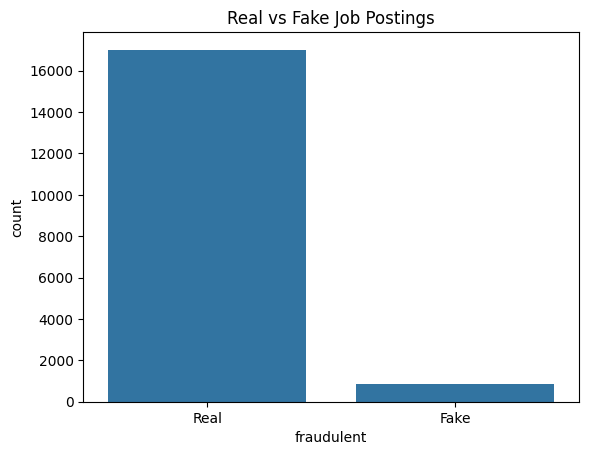

In [25]:
fraud_counts = df['fraudulent'].value_counts()
fraud_percent = fraud_counts / fraud_counts.sum() * 100

print(fraud_percent)

# Plot
sns.countplot(x='fraudulent', data=df)
plt.title("Real vs Fake Job Postings")
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()


<Axes: xlabel='has_company_logo', ylabel='fraudulent'>

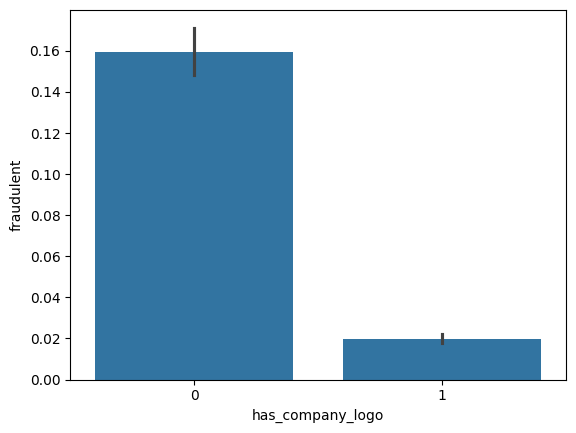

In [26]:
sns.barplot(x=df['has_company_logo'],y=df['fraudulent'])

<Axes: xlabel='fraudulent', ylabel='Density'>

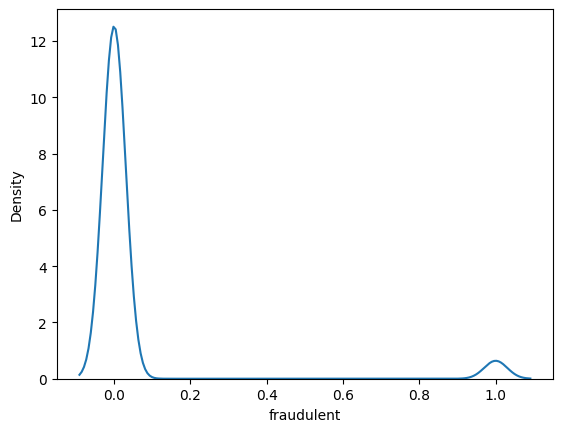

In [27]:
sns.kdeplot(df['fraudulent'])

***Most common job titles in fake vs real job postings?***

In [28]:
# Filter fake job postings
fake_postings = df[df['fraudulent'] == 1]

# Get the most common job titles
fake_titles = fake_postings['title'].value_counts().head(15)

# Display the most common job titles in fake postings
print("Most Common Job Titles in Fake Postings:")
print(fake_titles)

Most Common Job Titles in Fake Postings:
title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Payroll Clerk                                                           10
Agency Sales Managers $150-$175,000/yr                                   9
Data Entry                                                               9
Lawn and Maintenance Contractors                     

/tmp/ipython-input-2119419907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fake_titles.values, y=fake_titles.index, palette='viridis')


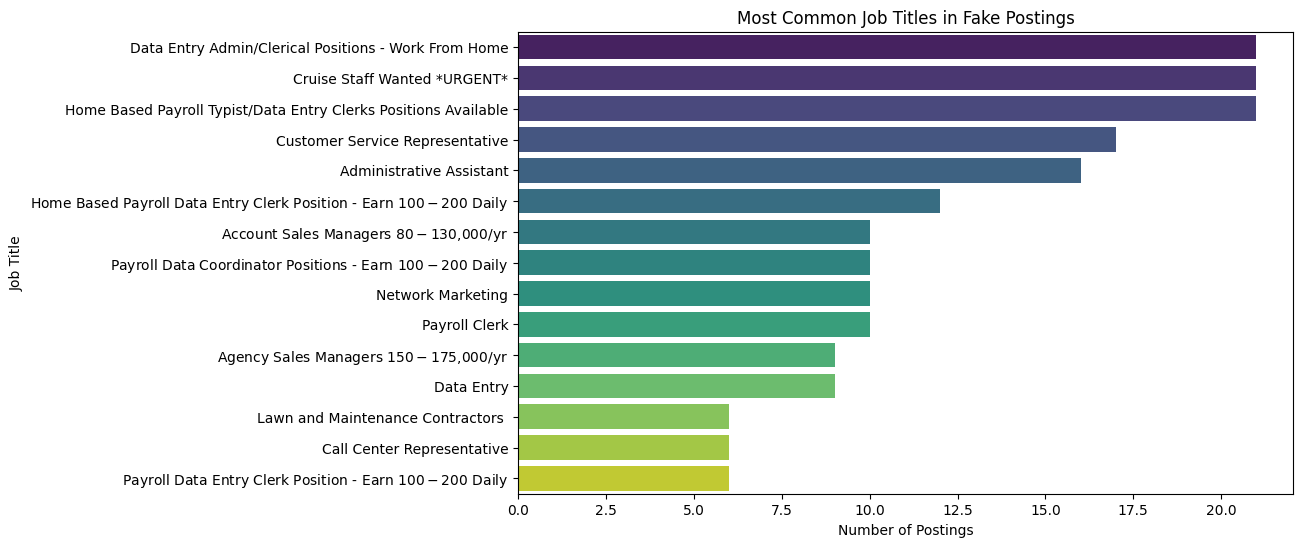

In [29]:
# Visualize the most common job titles in fake postings
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_titles.values, y=fake_titles.index, palette='viridis')
plt.title("Most Common Job Titles in Fake Postings")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.show()

In [30]:
# Filter Real job postings
real_postings = df[df['fraudulent'] == 0]

# Get the most common job titles
real_titles = real_postings['title'].value_counts().head(15)

# Display the most common job titles in fake postings
print("Most Common Job Titles in Real Postings:")
print(real_titles)

Most Common Job Titles in Real Postings:
title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Product Manager                                        47
Marketing Manager                                      45
Web Designer                                           44
Name: count, dtype: int64


/tmp/ipython-input-231004181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=real_titles.values, y=real_titles.index, palette='viridis')


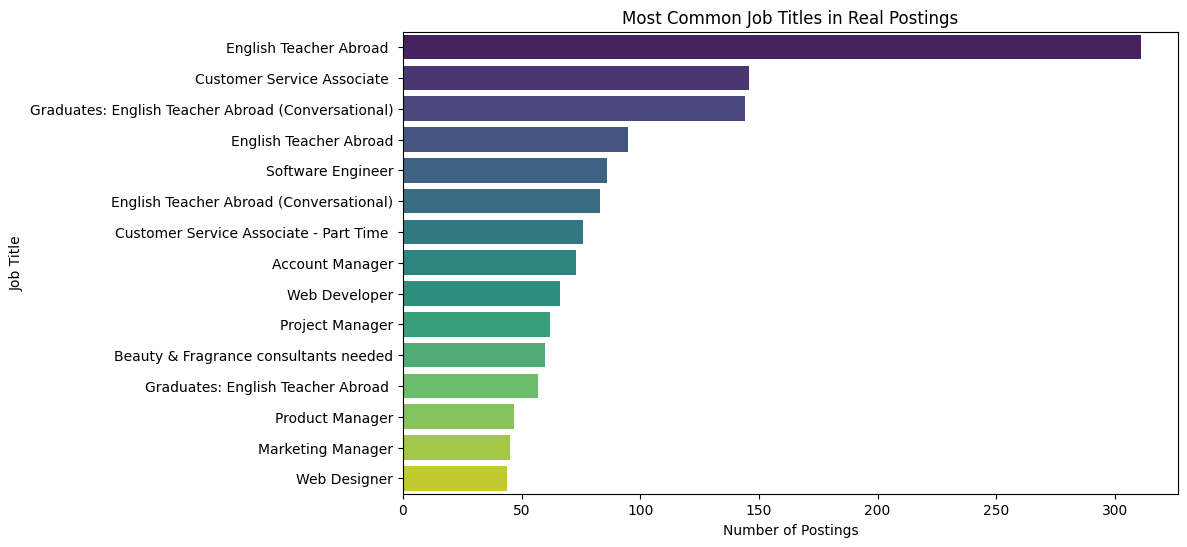

In [31]:
# Visualize the most common job titles in real postings
plt.figure(figsize=(10, 6))
sns.barplot(x=real_titles.values, y=real_titles.index, palette='viridis')
plt.title("Most Common Job Titles in Real Postings")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.show()

***locations and industries have the highest proportion of fraudulent postings***

In [32]:
# Locations with the highest proportion of fraudulent postings
location_fraud = df.groupby('location')['fraudulent'].mean().sort_values(ascending=False)
print("Locations with the highest proportion of fraudulent postings:")
print(location_fraud.head(10))

# Industries with the highest proportion of fraudulent postings
industry_fraud = df.groupby('industry')['fraudulent'].mean().sort_values(ascending=False)
print("\nIndustries with the highest proportion of fraudulent postings:")
print(industry_fraud.head(10))

Locations with the highest proportion of fraudulent postings:
location
US, CA, LOS   ANGELES    1.0
US, DE,                  1.0
US, NJ, NEWARK           1.0
GB, AGB,                 1.0
US, ND, Abercrombie      1.0
US, VA, Marshall         1.0
US, ND, Absaraka         1.0
US, FL, 32008            1.0
US, FL, 32065            1.0
US, IN, 46259  ACTON     1.0
Name: fraudulent, dtype: float64

Industries with the highest proportion of fraudulent postings:
industry
Ranching                     1.000000
Military                     0.500000
Animation                    0.400000
Oil & Energy                 0.379791
Accounting                   0.358491
Leisure, Travel & Tourism    0.276316
Computer Networking          0.272727
Executive Office             0.250000
Defense & Space              0.222222
Investment Management        0.166667
Name: fraudulent, dtype: float64


/tmp/ipython-input-1182280232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_fraud.head(10).values, y=location_fraud.head(10).index, palette='viridis')


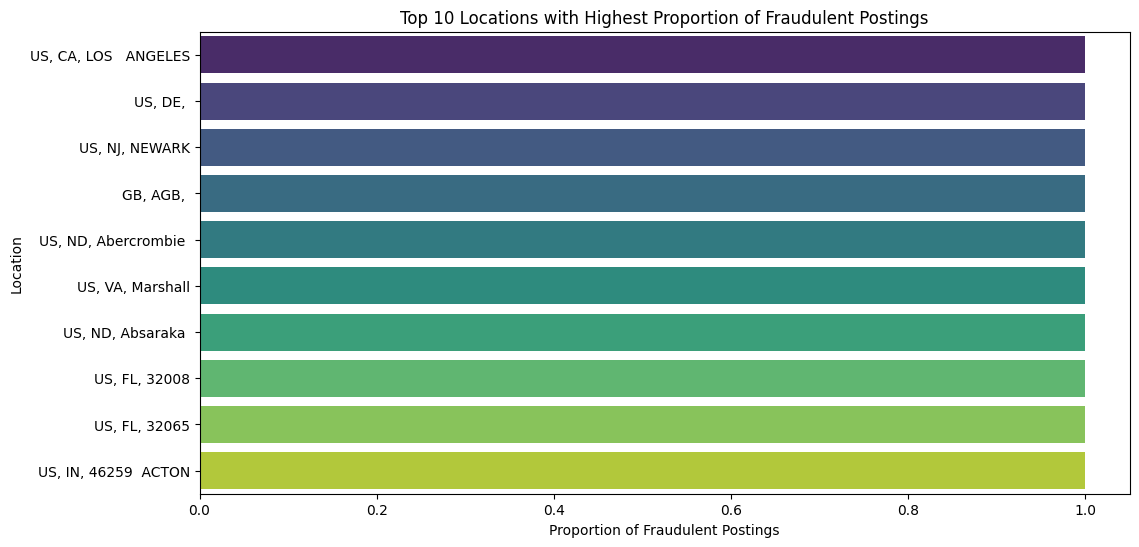

/tmp/ipython-input-1182280232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_fraud.head(10).values, y=industry_fraud.head(10).index, palette='viridis')


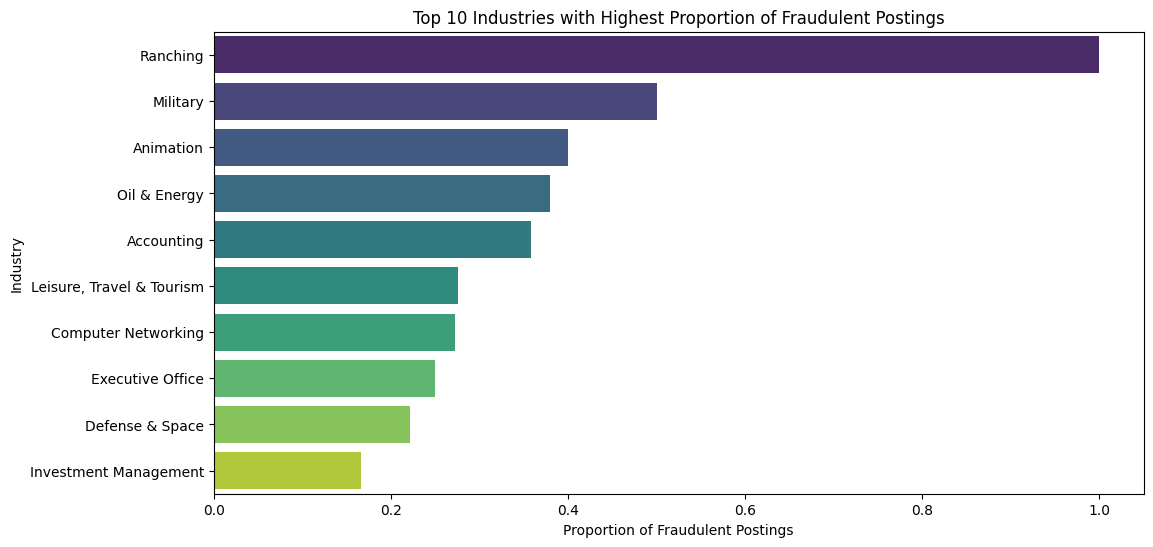

In [33]:
# Plot locations with the highest proportion of fraudulent postings
plt.figure(figsize=(12, 6))
sns.barplot(x=location_fraud.head(10).values, y=location_fraud.head(10).index, palette='viridis')
plt.title("Top 10 Locations with Highest Proportion of Fraudulent Postings")
plt.xlabel("Proportion of Fraudulent Postings")
plt.ylabel("Location")
plt.show()

# Plot industries with the highest proportion of fraudulent postings
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_fraud.head(10).values, y=industry_fraud.head(10).index, palette='viridis')
plt.title("Top 10 Industries with Highest Proportion of Fraudulent Postings")
plt.xlabel("Proportion of Fraudulent Postings")
plt.ylabel("Industry")
plt.show()

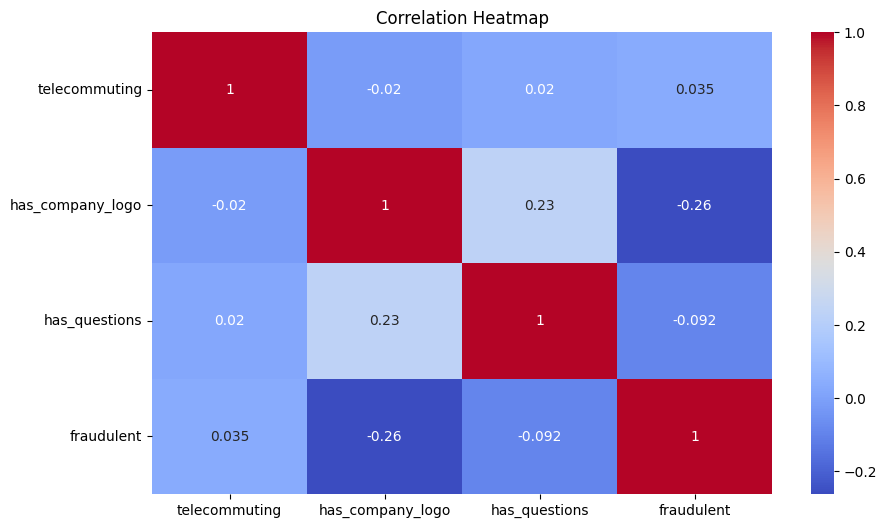

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
df

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,0,1,0,Unknown,Unknown,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,0,0,0,Full-time,Unknown,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,Graphic Designer,"NG, LA, Lagos",Unknown,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-pa

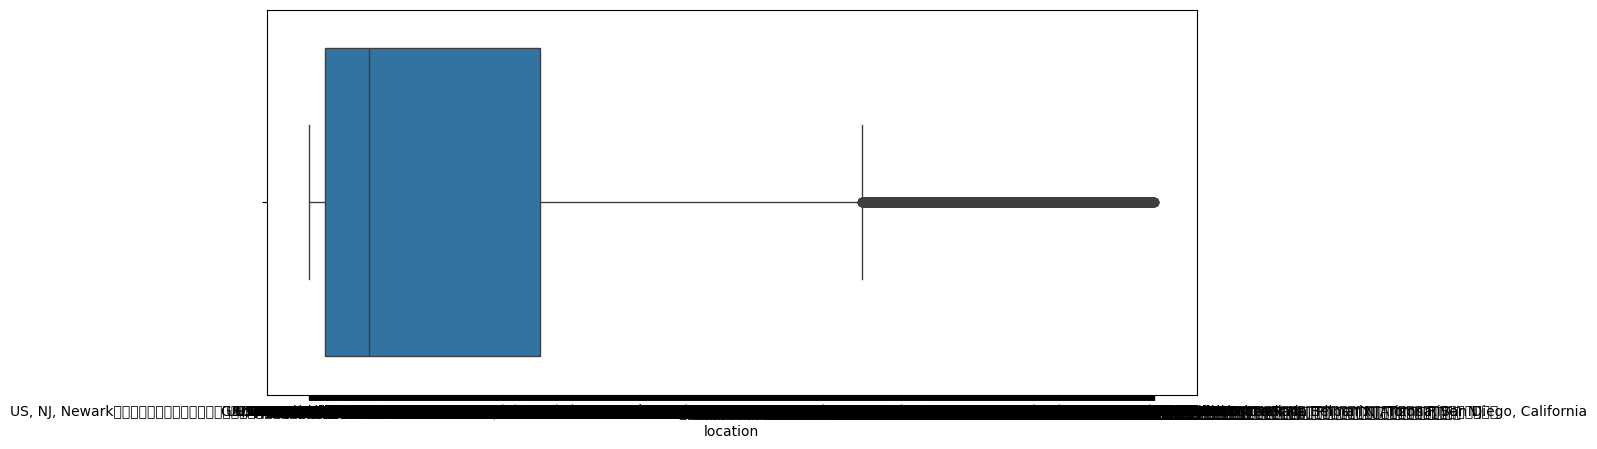

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


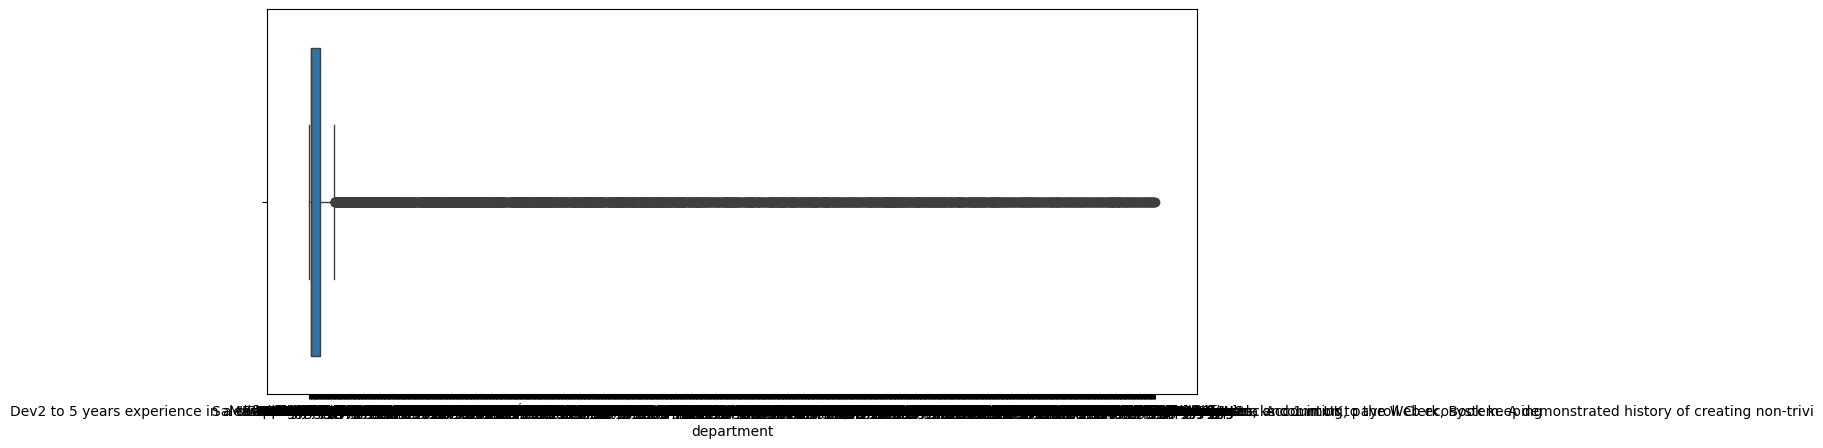

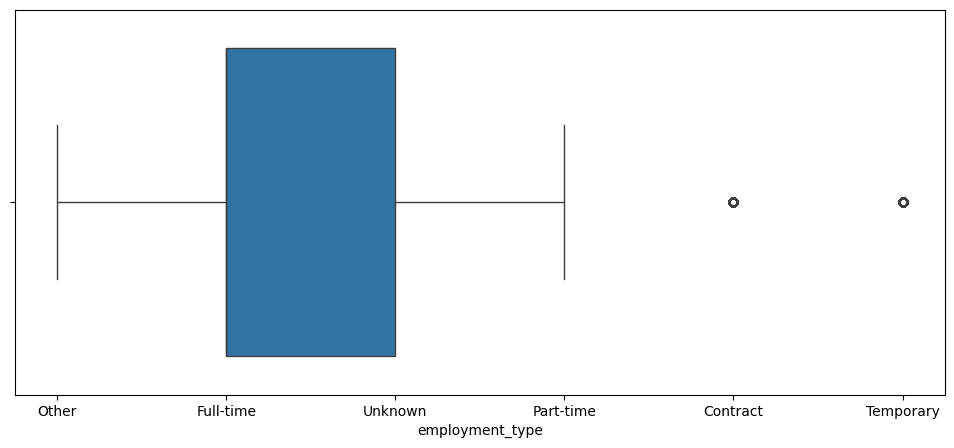

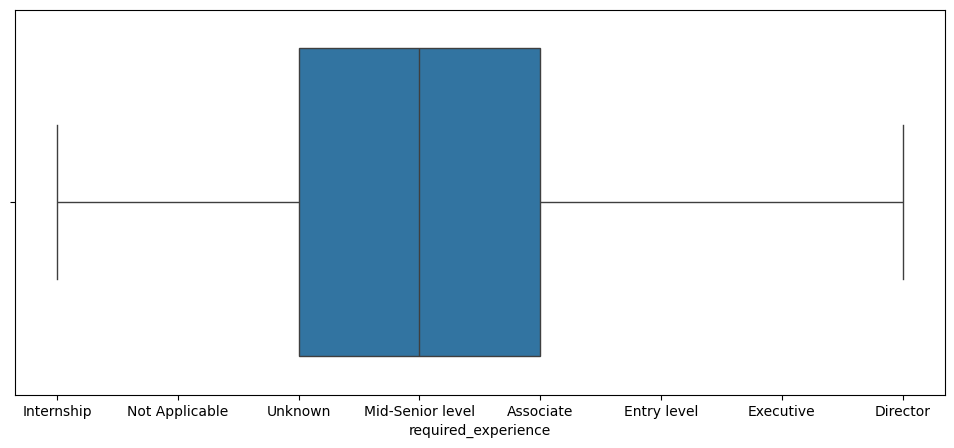

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['location', 'department', 'employment_type', 'required_experience']

for i in cat_cols:
  plt.figure(figsize=(12,5))
  sns.boxplot(x=i,data=df)
  plt.show()

In [37]:
df

,title,location,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,0,1,0,Unknown,Unknown,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,0,0,0,Full-time,Unknown,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,Graphic Designer,"NG, LA, Lagos",Unknown,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [38]:
x=df.drop(columns=['fraudulent'])
y=df['fraudulent']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [41]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    transformers=[
        ('oh1',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),[0,1,2,6,7,9,10]),
        ('ord',OrdinalEncoder(),[8])
    ],remainder='passthrough'
)

In [42]:
x_train_trf=ct.fit_transform(x_train)
x_test_trf=ct.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [43]:
x_test_trf

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
le=LogisticRegression()
le.fit(x_train_trf,y_train)

LogisticRegression()

In [46]:
y_pred=le.predict(x_test_trf)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.0171513795675

# **Using Decison Tree.**

In [48]:
from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier(max_depth=5,random_state=42)
de.fit(x_train_trf,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [49]:
y_pred=de.predict(x_test_trf)

In [51]:
accuracy_score(y_test,y_pred)*100

96.19686800894854

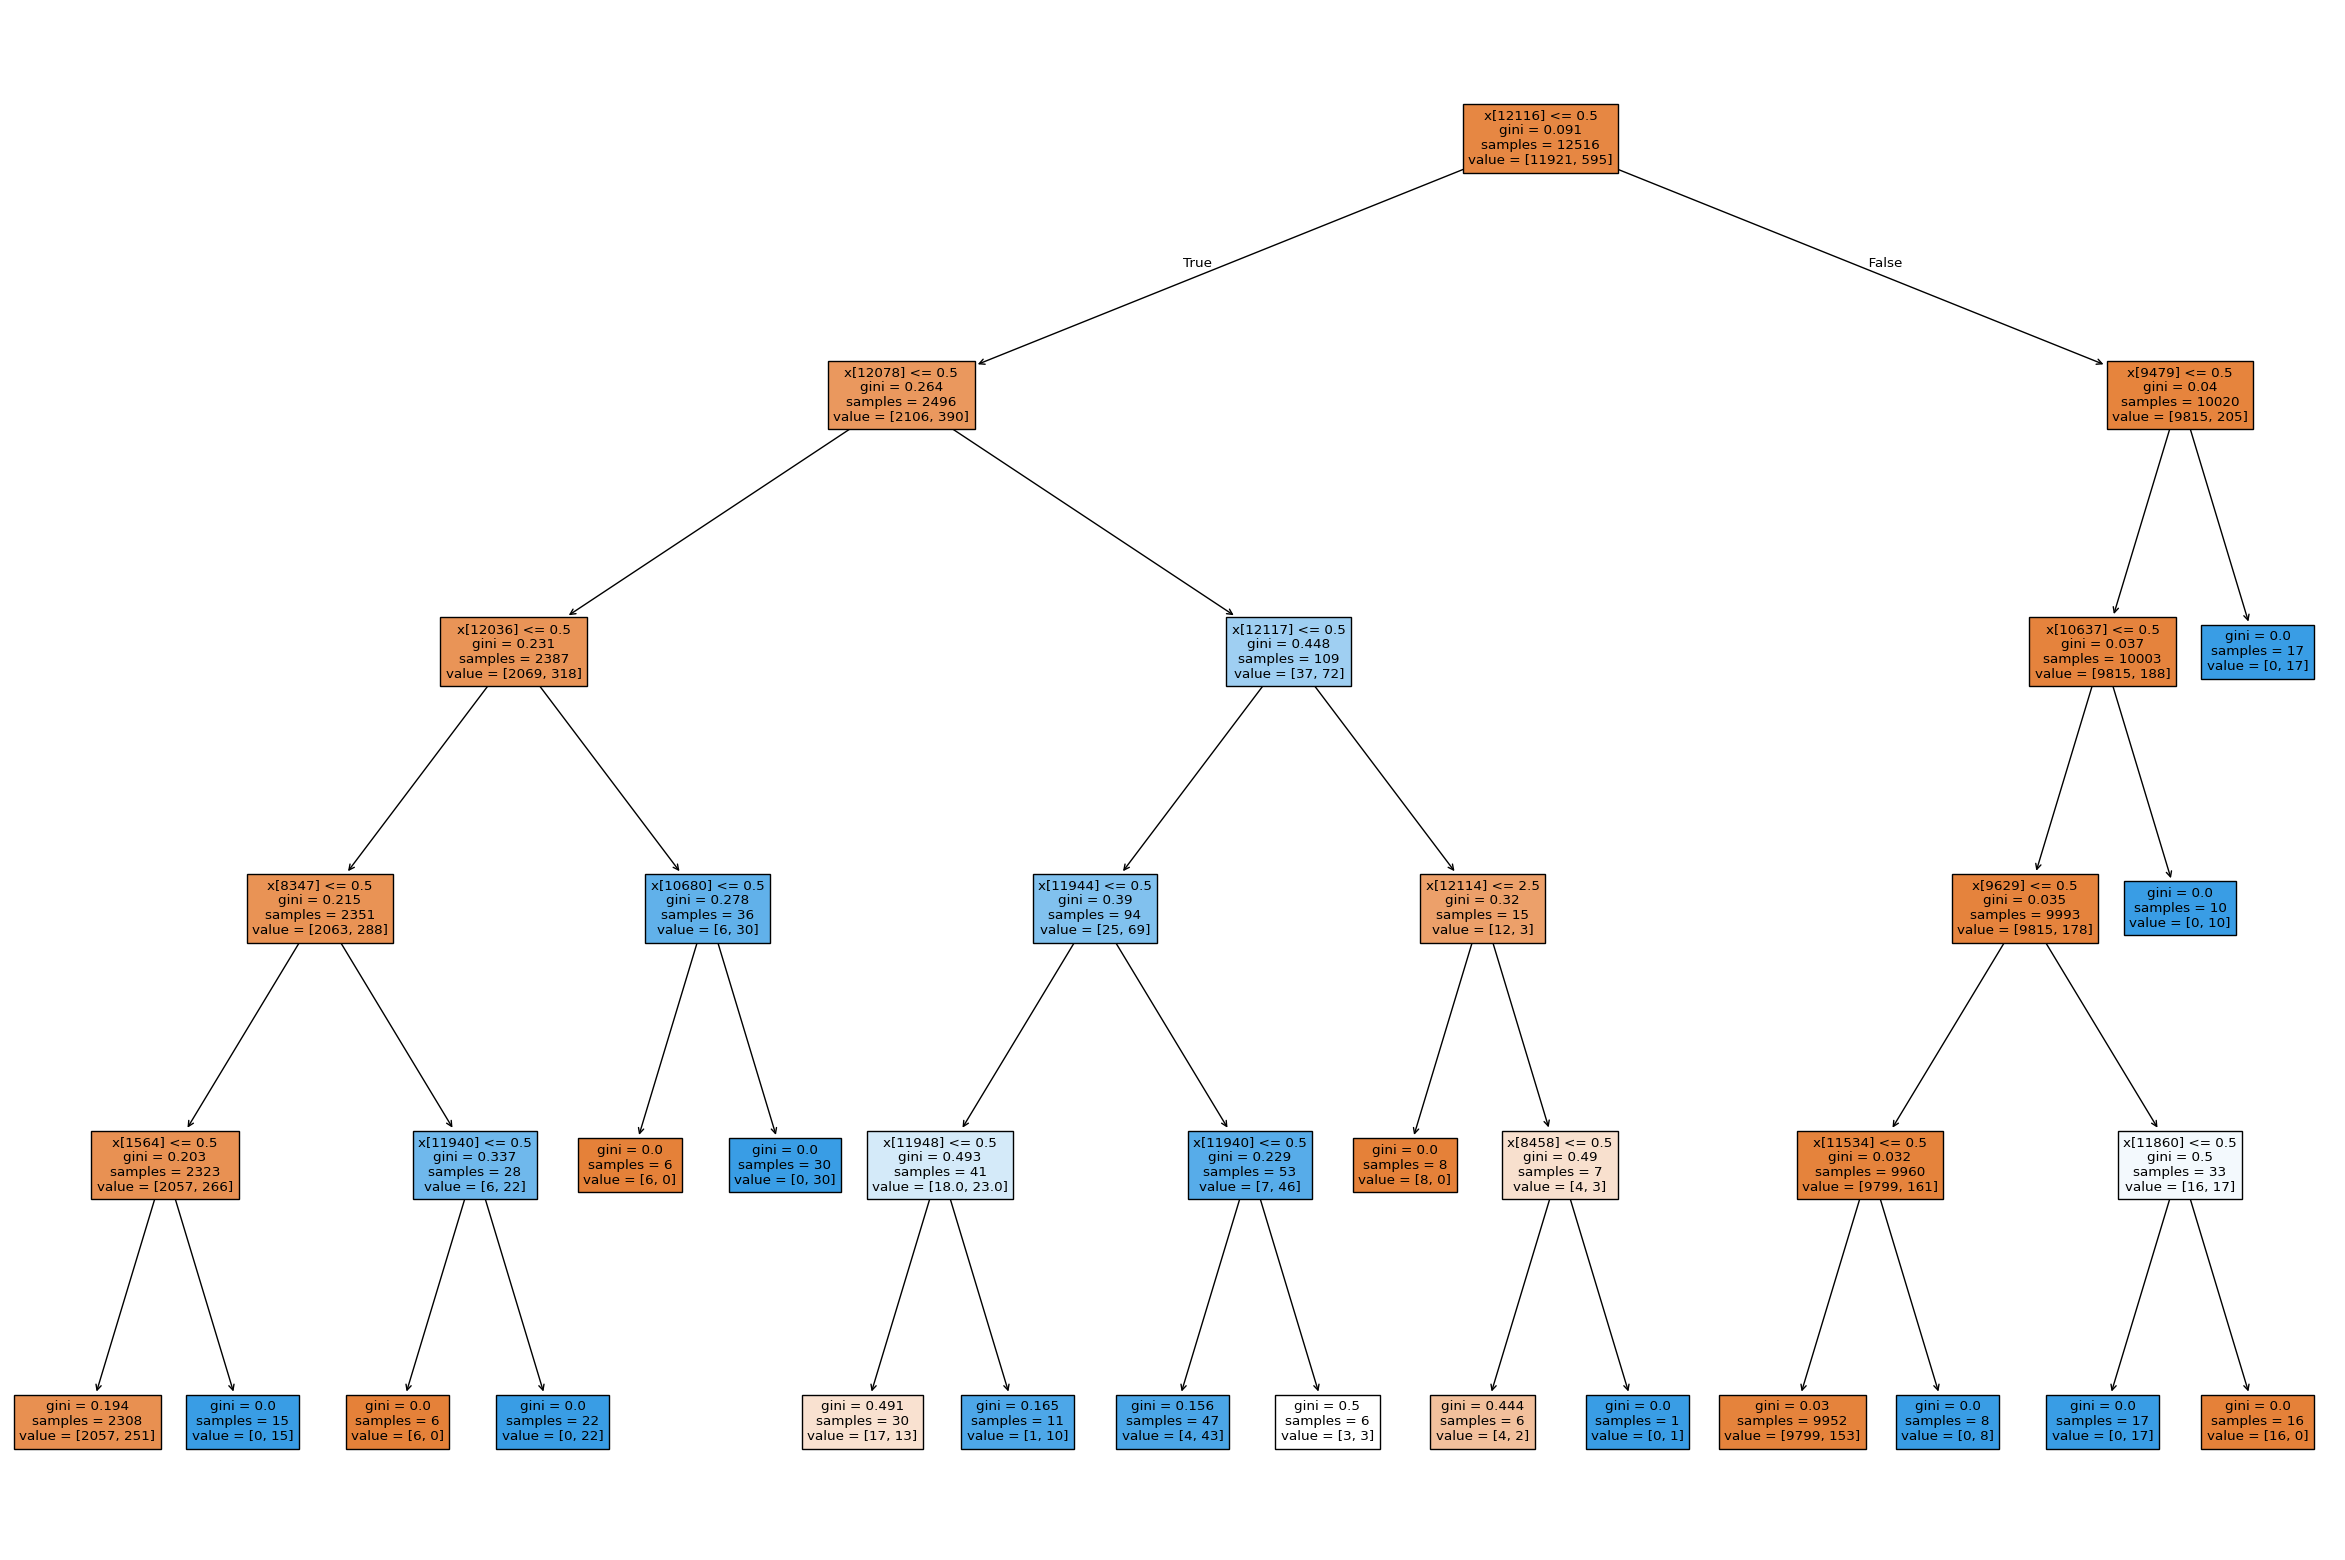

In [55]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(de,filled=True)
plt.show()